In [50]:
# !pip install gglasso

In [51]:
# !pip install decorator==5.0.9

In [52]:
from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import pandas as pd


In [53]:
# p = 20
# N = 1000

# Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, seed=1234)

# S, sample = sample_covariance_matrix(Sigma, N)

# print("Shape of empirical covariance matrix: ", S.shape)
# print("Shape of the sample array: ", sample.shape)

In [54]:
wine = pd.read_csv("/Users/pushpamahendra/Praxis Business School-Pushpa’s MacBook Air/Dataset/Wine-quality/winequality-white.csv",delimiter=";")

In [55]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [56]:
X = wine.drop(['quality'],axis=1)

In [57]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [58]:
# X= preprocessing.scale(X)

In [59]:
np.cov(X).shape

(4898, 4898)

In [60]:
Sigma = np.cov(X.T)
Sigma.shape

(11, 11)

In [61]:
N = X.shape[0]

In [62]:
Theta = np.linalg.inv(Sigma)
Theta,Theta.shape

(array([[ 3.77950284e+00,  1.89088897e+00, -2.12684224e+00,
          9.19864891e-01,  1.69133584e+01,  1.04582933e-04,
          2.66065925e-03, -2.43269745e+03,  1.27100732e+01,
          3.20908223e+00, -2.65152529e+00],
        [ 1.89088897e+00,  1.12323596e+02,  1.64001501e+01,
          4.87249921e-01, -5.34327862e+01,  1.57737841e-01,
         -7.37515210e-02, -1.99856277e+03,  1.13956209e+01,
          6.48931247e+00, -4.32760745e+00],
        [-2.12684224e+00,  1.64001501e+01,  7.95597088e+01,
          2.81847410e-01, -4.85406062e+01, -2.56511226e-02,
         -1.27623460e-02, -1.07183653e+03,  7.22705725e+00,
         -3.40976184e+00, -1.89364405e+00],
        [ 9.19864891e-01,  4.87249921e-01,  2.81847410e-01,
          4.91494072e-01,  7.03645401e+00, -9.83501222e-03,
          3.29844258e-03, -1.17265007e+03,  4.37303038e+00,
          1.74951575e+00, -1.23510437e+00],
        [ 1.69133584e+01, -5.34327862e+01, -4.85406062e+01,
          7.03645401e+00,  2.59110521e+03, -

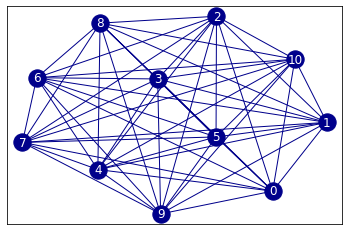

In [63]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

In [64]:
A

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [65]:
S, sample = sample_covariance_matrix(Sigma, N)

In [66]:
S.shape

(11, 11)

In [67]:
P = glasso_problem(Sigma, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [68]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 206 iterations with status: optimal.
ADMM terminated after 196 iterations with status: optimal.
ADMM terminated after 180 iterations with status: optimal.
ADMM terminated after 95 iterations with status: optimal.
ADMM terminated after 78 iterations with status: optimal.
ADMM terminated after 70 iterations with status: optimal.
ADMM terminated after 63 iterations with status: optimal.
ADMM terminated after 57 iterations with status: optimal.
ADMM terminated after 53 iterations with status: optimal.
ADMM terminated after 121 iterations with status: optimal.
ADMM terminated after 76 iterations with status: optimal.
ADMM terminated after 504 iterations with status: optimal.
ADMM terminated after 253 iterations with status: optimal.
ADMM terminated after 962 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 143 iterations with statu

Text(0.5, 1.0, 'Recovered precision matrix')

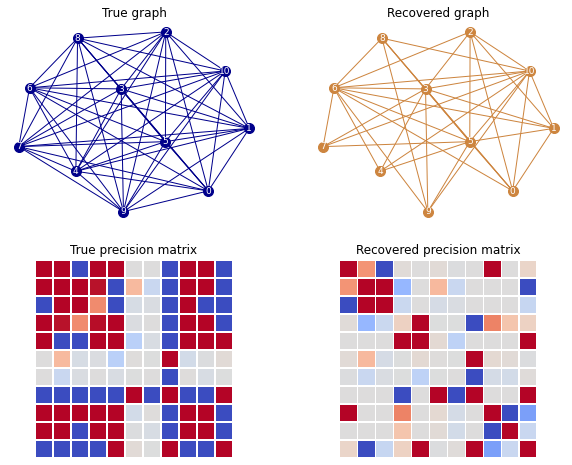

In [69]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(10,8))
node_size = 100
font_size = 9

nx.draw_networkx(G, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", \
                 font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,0])
axs[0,0].axis('off')
axs[0,0].set_title("True graph")

G1 = nx.from_numpy_array(P.solution.adjacency_)
nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,1])
axs[0,1].axis('off')
axs[0,1].set_title("Recovered graph")

sns.heatmap(Theta, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")

sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")

In [70]:
# X = cars[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#        'Acceleration']]